---
title: "Unsupervised Learning"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

{{< include instructions.qmd >}} 

# Code 

Provide the source code used for this section of the project here.

If you're using a package for code organization, you can import it at this point. However, make sure that the **actual workflow steps**—including data processing, analysis, and other key tasks—are conducted and clearly demonstrated on this page. The goal is to show the technical flow of your project, highlighting how the code is executed to achieve your results.

If relevant, link to additional documentation or external references that explain any complex components. This section should give readers a clear view of how the project is implemented from a technical perspective.

Remember, this page is a technical narrative, NOT just a notebook with a collection of code cells, include in-line Prose, to describe what is going on.

In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
# Load the CSV file
file_path = '../../data/processed-data/merged_data.csv'
data = pd.read_csv(file_path)

## PCA and t-SNE for Assessment Variables

In the dataset, there are 48 dimensions (e.g., workplace environment, compensation and benefits, prevention of violence and harassment) that evaluate a company’s practices in terms of gender equality and respect. The "Assessment" variables, recorded as binary values (Met or Unmet), provide detailed insights into how companies perform across various gender equality dimensions.

By applying PCA and t-SNE, we aim to understand how these 48 dimensions collectively influence a company’s overall gender equality and respect score (Total Score).

The explanation of these 48 dimensions are shown in the dataframe below:

In [80]:
# Extract columns called "Explanation"
explanation_columns = [col for col in data.columns if "Explanation" in col]

# Count the number of "Explanation" olumns
num_explanation_columns = len(explanation_columns)
print(f"Number of columns containing 'Explanation': {num_explanation_columns}")

# Store the unique values in these columns
unique_values_dict = {col: data[col].dropna().unique().tolist() for col in explanation_columns}

# Convert to DataFrame
unique_values_df = pd.DataFrame(
    [{"Column": col, "Unique Values": unique_values_dict[col]} for col in unique_values_dict]
)

print(unique_values_df)

Number of columns containing 'Explanation': 48
                    Column                                      Unique Values
0    SA-A01.EA-Explanation  [company states committed equality opportunity...
1    GT-A02.EA-Explanation  [company identified specific timebound targets...
2    GT-A02.EC-Explanation  [company discloses one timebound targets gende...
3   GDD-A04.EA-Explanation  [evidence found company assesses prioritises g...
4   GDD-A04.EB-Explanation  [evidence found company engages women part ris...
5    GM-A05.EA-Explanation  [company provides email id hotline number webs...
6    GM-A05.EB-Explanation  [company provides email id hotline number webs...
7    GM-A05.EC-Explanation  [evidence found whether company collects analy...
8    SE-A06.EA-Explanation  [although company employee feedback mechanisms...
9   CAP-A07.EA-Explanation  [evidence found whether company screens gender...
10  CAP-A07.EB-Explanation  [evidence found company categorises noncomplia...
11   GL-B01.EA-Ex

In [81]:
# Select columns containing "Assessment" and Total Score
assessment_columns = [col for col in data.columns if "Assessment" in col]
data_cleaned_assessment = data.dropna(subset=['Total'] + assessment_columns)

# Encode Met/Unmet as binary values
data_cleaned_assessment_encoded = data_cleaned_assessment.copy()
data_cleaned_assessment_encoded[assessment_columns] = data_cleaned_assessment[assessment_columns].apply(lambda col: col.map(lambda x: 1 if x == 'Met' else 0))

# Scale the encoded assessment variables
scaler = MinMaxScaler()
assessment_data_scaled = scaler.fit_transform(data_cleaned_assessment_encoded[assessment_columns])

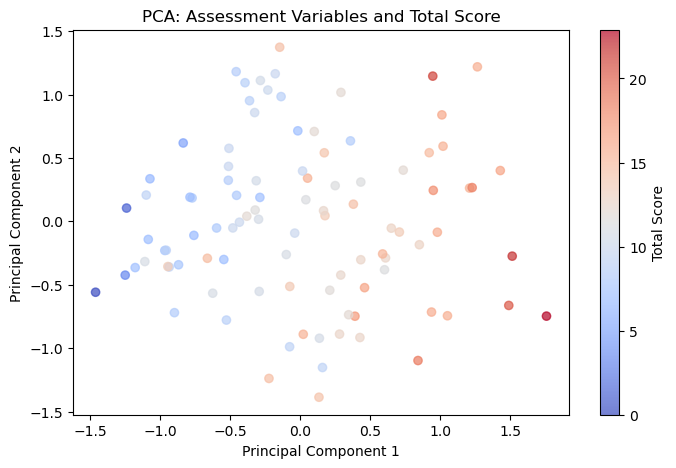

In [82]:
# Apply PCA
pca_assessment = PCA(n_components=2)
pca_assessment_result = pca_assessment.fit_transform(assessment_data_scaled)

# Visualize PCA results
plt.figure(figsize=(8, 5))
plt.scatter(pca_assessment_result[:, 0], pca_assessment_result[:, 1], c=data_cleaned_assessment['Total'], cmap='coolwarm', alpha=0.7)
plt.title('PCA: Assessment Variables and Total Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Total Score')
plt.show()

This PCA visualization shows the distribution of companies based on the first two principal components (PC1 and PC2) derived from their Assessment Variables (e.g., workplace practices, compensation, prevention of harassment). The color gradient represents the Total Score, with blue indicating lower scores and red indicating higher scores.

**Visual Observations**:
1. Spread Along Principal Component 1 (PC1):

- The horizontal axis (PC1) accounts for the largest proportion of variance in the assessment data.
- Companies on the right (positive PC1 values) tend to have higher Total Scores (red points), while companies on the left (negative PC1 values) generally have lower Total Scores (blue points).
- This indicates that PC1 captures a primary dimension of performance across the assessments, with higher values representing better alignment with gender equality standards.

2. Spread Along Principal Component 2 (PC2):

- The vertical axis (PC2) captures the second-largest proportion of variance, showing additional dimensions of differentiation in company performance.
- There is no clear trend between PC2 values and Total Score, suggesting that PC2 may represent secondary characteristics or a more nuanced aspect of compliance with assessment standards.

3. Clusters and Patterns:

- Companies with similar Total Scores tend to cluster together along PC1. For example: High-scoring companies (Total Score > 15) are more concentrated on the right side of the plot. Low-scoring companies (Total Score < 5) are more prevalent on the left.
- However, there is some overlap between mid-range scoring companies (light blue to gray), suggesting that certain Assessment Variables may not fully differentiate these companies.

**Key Insights**:
1. PC1 as a Key Driver of Total Score:

- The strong alignment between PC1 and Total Score suggests that this component captures the primary dimension of compliance with gender equality standards.
- High PC1 values likely reflect better overall performance across most assessment dimensions.

2. PC2 Adds Secondary Differentiation:

- PC2 does not correlate strongly with Total Score but may represent nuanced differences in how companies approach specific dimensions of gender equality.

3. Clustering of High- and Low-Scoring Companies:

- Companies with high Total Scores are more clearly separated along PC1, indicating stronger compliance across multiple assessment dimensions.
- Low-scoring companies are concentrated in the negative PC1 region, reflecting widespread non-compliance or unmet standards.

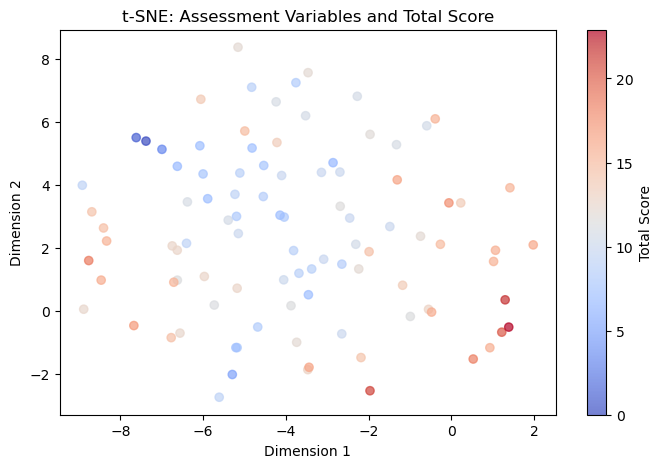

In [83]:
# Apply t-SNE
tsne_assessment = TSNE(n_components=2, random_state=42)
tsne_assessment_result = tsne_assessment.fit_transform(assessment_data_scaled)

# Visualize t-SNE results
plt.figure(figsize=(8, 5))
plt.scatter(tsne_assessment_result[:, 0], tsne_assessment_result[:, 1], c=data_cleaned_assessment['Total'], cmap='coolwarm', alpha=0.7)
plt.title('t-SNE: Assessment Variables and Total Score')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Total Score')
plt.show()

This t-SNE plot visualizes the distribution of companies based on their Assessment Variables, with Total Score represented by the color gradient. Blue points indicate companies with lower Total Scores, while red points represent companies with higher Total Scores.

Unlike PCA, t-SNE focuses on preserving the local relationships in the data, capturing potential non-linear patterns that might not be visible with linear dimensionality reduction methods.

**Visual Observations**:
1. Clustering Patterns:

- Companies with similar Total Scores tend to cluster together, indicating that certain groups of companies share common assessment profiles.
- For example: Low-scoring companies (blue) tend to form clusters in the left-hand side of the plot (e.g., Dimension 1 < -4). High-scoring companies (red) are more dispersed but tend to occupy distinct positions toward the right-hand side (Dimension 1 > 0).

2. Separation by Total Score:

- There is a clear separation between low-scoring and high-scoring companies along Dimension 1.
- Companies with high Total Scores appear less clustered and more dispersed, potentially reflecting greater diversity in their compliance with different assessment dimensions.

3. Overlapping Mid-Range Scores:

- Companies with mid-range Total Scores (light blue to gray) show significant overlap across the plot.
- This indicates that mid-range performers may not exhibit distinctive patterns in their assessment profiles, or their scores might be influenced by a balanced mix of "Met" and "Unmet" assessments across dimensions.

**Key Insights**:
1. Assessment Variables as Drivers of Total Score:

- The clustering of companies by Total Score suggests that the Assessment Variables collectively determine performance.
- High-scoring companies are distinctly separated from low-scoring ones, indicating that compliance with certain key dimensions contributes significantly to Total Score.

2. Diversity Among High-Scoring Companies:

- The dispersed nature of high-scoring companies suggests variability in how these companies achieve high Total Scores. For instance, some companies might excel in workplace environment dimensions, while others might focus more on compensation and benefits.

3. Homogeneity of Low-Scoring Companies:

- Low-scoring companies cluster more tightly, implying that their poor performance is likely due to consistent non-compliance across multiple assessment dimensions.

## K-Means Clustering Analysis to Identify Patterns in Gender Equality Assessments

This K-Means clustering analysis groups companies based on their performance across gender equality assessment dimensions. It highlights similarities in company practices and explores how these clusters correlate with **CEO Gender, Total Score, and key financial indicators** we have identified in the EDA stage which has significant differences between male- and female-led companies: **Gross Profit, Revenue from Contract with Customer, Compensation Expense, and Accounts Receivable**. The results aim to uncover meaningful patterns and provide insights into organizational behaviors and their impact on gender equality and financial outcomes.

In [136]:
# Select columns containing "Assessment"
assessment_columns = [col for col in data.columns if "Assessment" in col]

# Ensure no missing values and convert 'Met' to 1 and 'Unmet' to 0
data_cleaned = data[assessment_columns + ['CEO Gender', 'Total', 
    'GrossProfit (k)', 'RevenueFromContractWithCustomerExcludingAssessedTax (k)',
    'AllocatedShareBasedCompensationExpense (k)', 'AccountsReceivableNetCurrent (k)']].dropna()

data_cleaned[assessment_columns] = data_cleaned[assessment_columns].apply(
    lambda col: col.map(lambda x: 1 if x == 'Met' else 0)
)

# Standardize the data
scaler = MinMaxScaler()
assessment_data_scaled = scaler.fit_transform(data_cleaned[assessment_columns])

In [137]:
# Determine the optimal number of clusters using Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K = range(2, 10)  # Number of clusters from 2 to 9

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(assessment_data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(assessment_data_scaled, kmeans.labels_))

Text(0, 0.5, 'Inertia')

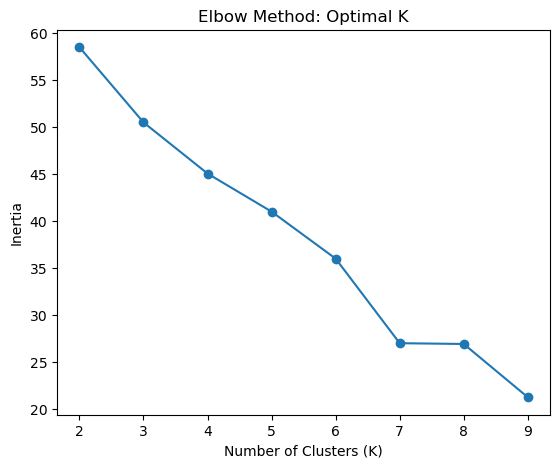

In [138]:
# Visualize Elbow Method
plt.figure(figsize=(14, 5))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method: Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

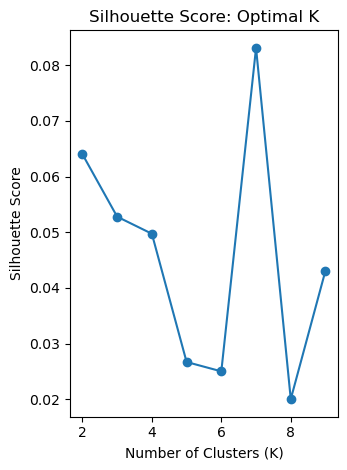

In [139]:
# Visualize Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score: Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Determine the optimal number of clusters k:
- As seen in the Elbow Method plot, the inertia decreases significantly as k increases but begins to level off after k=7, suggesting that adding more clusters beyond this point provides diminishing returns in terms of reducing the within-cluster variance. 
- Additionally, the highest Silhouette Score is achieved at k=7, indicating the strongest cluster separation at this value.

Based on these results, k=7 is selected as the optimal number of clusters, as it balances the trade-off between within-cluster variance and cluster separation.

In [140]:
# Apply K-Means clustering
optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(assessment_data_scaled)

# Map CEO Gender to numeric values (Male = 0, Female = 1)
data_cleaned['CEO Gender'] = data_cleaned['CEO Gender'].map({'Male': 0, 'Female': 1})

# Compute the mean for numeric columns (Total Score and financial indicators)
cluster_summary_numeric = data_cleaned.groupby('Cluster')[
    ['Total', 
     'GrossProfit (k)', 
     'RevenueFromContractWithCustomerExcludingAssessedTax (k)',
     'AllocatedShareBasedCompensationExpense (k)', 
     'AccountsReceivableNetCurrent (k)']
].mean()

# Compute the proportion of CEO Gender for each cluster
cluster_gender_distribution = data_cleaned.groupby('Cluster')['CEO Gender'].value_counts(normalize=True).unstack()

# Combine the results into a single summary table
cluster_summary = pd.concat([cluster_summary_numeric, cluster_gender_distribution], axis=1)

# Display the combined summary
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
             Total  GrossProfit (k)  \
Cluster                               
0        18.700000     1.528360e+08   
1        10.266667     1.329348e+07   
2        11.000000     3.659000e+06   
3         8.666667     4.543287e+06   
4         9.100000     5.092920e+05   
5        15.400000     8.597000e+06   
6        11.500000     7.736337e+06   

         RevenueFromContractWithCustomerExcludingAssessedTax (k)  \
Cluster                                                            
0                                             3.658170e+08         
1                                             2.243594e+07         
2                                             4.125550e+07         
3                                             9.786418e+06         
4                                             6.564260e+05         
5                                             5.619700e+07         
6                                             1.360043e+07         

         Allocated

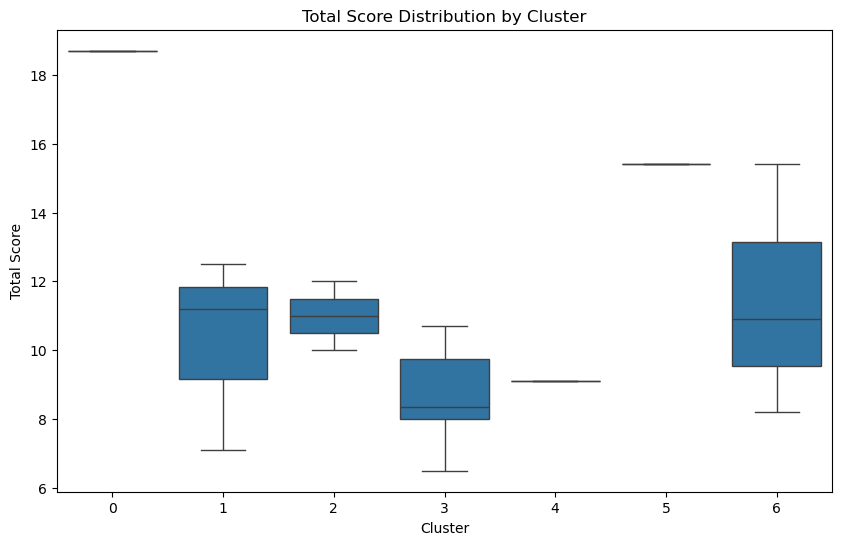

In [141]:
# Visualize the distributions of Total Score and financial indicators by cluster
# Total Score vs Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total', data=data_cleaned)
plt.title('Total Score Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Score')
plt.show()

The boxplot illustrates the distribution of Total Score across the 7 clusters identified by the K-Means algorithm.

**Visual Observations**:
1. Cluster Differences:
- Each cluster exhibits distinct Total Score distributions, indicating that companies grouped into different clusters vary significantly in their overall performance on gender equality and respect.
- Cluster 0 and Cluster 5, both have a narrow range, include companies with higher Total Scores.
- Cluster 3 and Cluster 4 display lower Total Scores, with Cluster 3 having the lowest median.

2. Variation Within Clusters:
- Cluster 1 and Cluster 6 show the widest range in Total Scores, suggesting that companies in these clusters exhibit more diversity in their compliance with gender equality standards.
- Cluster 0, Cluster 4, and Cluster 5 have very narrow distributions, implying more consistency among the companies within these groups.

3. Cluster 0 as an Outlier:
- Cluster 0 appears to have the highest Total Score distribution with minimal variance. This likely indicates that the companies in this cluster excel consistently across most assessment variables.

4. Middle Performers:
- Cluster 1 and Cluster 2 represent mid-range performers, with median Total Scores around 10-12. These clusters might include companies that meet some, but not all, gender equality standards.

5. Low Performers:
- Cluster 3 and Cluster 4 represent companies with the lowest Total Scores, indicating systemic weaknesses in meeting gender equality assessments. These clusters could be targeted for improvement strategies.

**Interpretation for Clusters**:
1. High-Performing Clusters (0 and 5):
- These clusters likely consist of companies that excel in meeting gender equality assessments across multiple dimensions. They can serve as benchmarks or role models for lower-performing groups.

2. Low-Performing Clusters (3 and 4):
- These clusters should be analyzed to identify specific areas of weakness in assessment variables, providing actionable insights for improvement.

3. Diversity in Cluster 1 and 6:
- The wide variation in Cluster 1’s and Cluster 6’s Total Scores suggests a mix of companies that perform inconsistently across different assessment dimensions.

4. Potential Patterns:
- The clustering results highlight meaningful groupings in Total Scores, aligning with the K-Means model’s goal of separating companies based on assessment similarity.

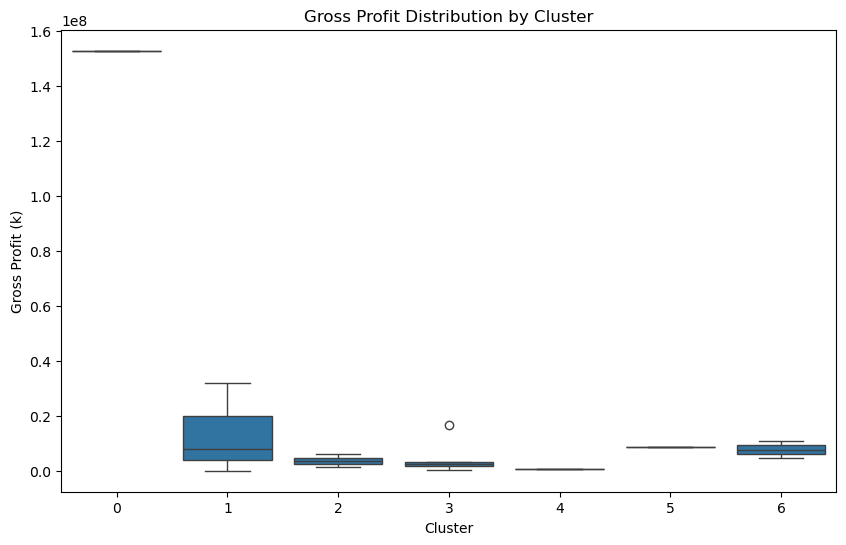

In [142]:
# Gross Profit vs Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='GrossProfit (k)', data=data_cleaned)
plt.title('Gross Profit Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Gross Profit (k)')
plt.show()

The boxplot shows the distribution of Gross Profit (k) across the 7 clusters identified by K-Means.

**Visual Observations**:
1. Distinctive Patterns Across Clusters:
- Cluster 0 stands out with significantly higher gross profit values compared to all other clusters. The gross profit for companies in this cluster is consistently above 1.5×10^8, indicating that these companies are financial outliers with exceptional performance.
- Cluster 1 also shows notable gross profit values but exhibits more variation compared to Cluster 0. The median is around 2。0×10^7, with a wide range, suggesting that Cluster 1 contains both mid-range and high-performing companies.

2. Homogeneity in Lower-Performing Clusters:
- Clusters 2, 3, 4, 5, and 6 display significantly lower gross profit distributions.
- The median values across these clusters are close to zero, with minimal variation, suggesting that companies in these clusters operate on a much smaller financial scale or have limited profitability.
- Outliers exist in Cluster 3, where one company shows a slightly higher gross profit compared to the cluster average.

3. Gross Profit as a Key Differentiator:
- Clusters 0 and 1 are financially distinct from the rest of the clusters. These two clusters may represent companies that operate at a much larger scale or have optimized their financial operations for higher profitability.
- The lower-performing clusters (2-6) indicate companies that may struggle to achieve significant gross profit or operate in less profitable industries.

**Interpretation for Clusters**:
1. Cluster 0:
- These companies are financial leaders and may also perform well in gender equality assessments due to available resources to invest in such initiatives.

2. Cluster 1:
- These companies are moderately profitable and may have varying levels of resources to implement gender equality practices.

3. Clusters 2-6:
- Companies in these clusters face financial constraints, which might limit their ability to invest in gender equality initiatives or workplace improvements.

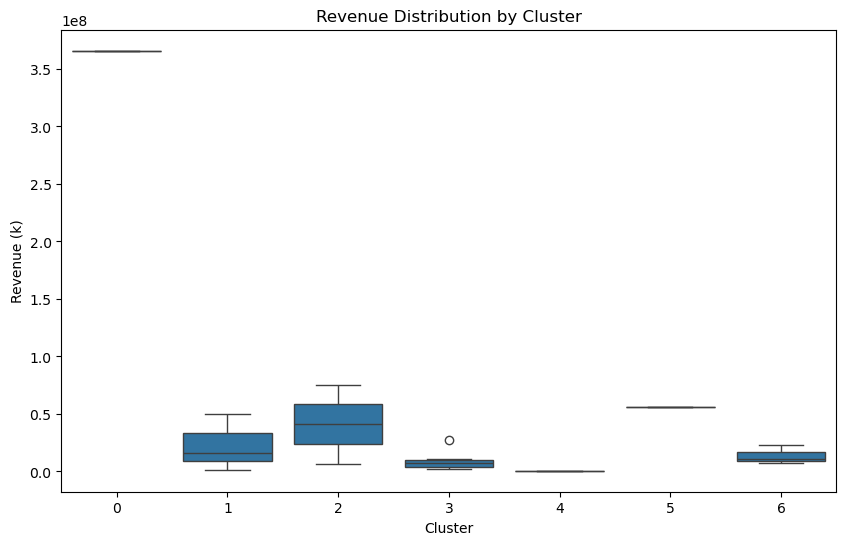

In [143]:
# Revenue vs Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='RevenueFromContractWithCustomerExcludingAssessedTax (k)', data=data_cleaned)
plt.title('Revenue Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Revenue (k)')
plt.show()

This boxplot illustrates the distribution of Revenue from Contract with Customers (k) across the 7 clusters.

**Visual Observations**:
1. Distinct Revenue Patterns Across Clusters:
- Cluster 0 demonstrates significantly higher revenue values compared to other clusters. Companies in this cluster have revenues consistently above 3.5×10^8, marking them as financial outliers.
- Clusters 2 and 5 show moderate revenue levels. Cluster 2 exhibits higher median revenue among the clusters, with a broad range extending up to 0.8×10^8. Cluster 5 has a even higher median revenue compared to Cluster 2, with a much narrower range of values.

2. Homogeneity Among Lower-Revenue Clusters:
- Clusters 1, 3, 4, and 6 display significantly lower revenue distributions. Median values for these clusters are close to zero, indicating that companies in these clusters operate at a smaller financial scale.
- Cluster 3 has a single outlier, with revenue slightly higher than the rest of the companies in the cluster.

3. Revenue as a Key Differentiator:
- Cluster 0 clearly separates itself as the top-performing group in terms of revenue, likely representing companies with a much larger operational scale or market dominance.
- Clusters 2 and 5 occupy the middle ground, representing moderately successful companies in terms of revenue generation.
- Clusters 1, 3, 4, and 6 highlight companies with minimal revenue, possibly indicating financial challenges or operation within less lucrative sectors.

**Interpretation for Clusters**:
1. High-Performing Cluster (Cluster 0):
- These companies generate substantially more revenue and may have greater resources to invest in initiatives such as gender equality or workplace improvements.

2. Moderate-Performing Clusters (Clusters 2 and 5):
- These clusters consist of companies with respectable revenue but not at the scale of Cluster 0. They may represent a mix of stable but smaller companies with the potential for growth.

3. Low-Performing Clusters (Clusters 1, 3, 4, and 6):
- These clusters highlight companies that may struggle with financial performance, potentially limiting their ability to address broader organizational improvements, such as gender equality initiatives.

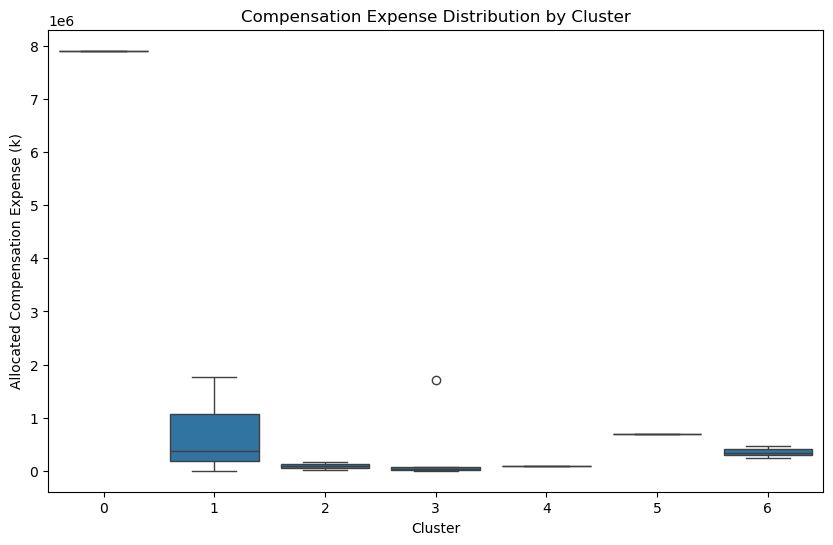

In [144]:
# Compensation Expense vs Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='AllocatedShareBasedCompensationExpense (k)', data=data_cleaned)
plt.title('Compensation Expense Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Allocated Compensation Expense (k)')
plt.show()

This boxplot illustrates the distribution of Allocated Share-Based Compensation Expense (k) across the 7 clusters identified in the K-Means analysis.

**Visual Observations**:
1. Distinct Expense Patterns Across Clusters:
- Cluster 0 shows significantly higher compensation expenses compared to all other clusters, with a narrow range around 8×10^6. This suggests that companies in this cluster allocate substantial resources to share-based compensation, likely indicating larger or more established organizations with significant employee equity programs.
- Cluster 1 and 5 also show relatively higher compensation expenses compared to other clusters. Cluster 1 has a wider range and a median around 0.4×10^6. Cluster 5 has a median around 0.9×10^6. Companies in these clusters represent moderately high spenders on share-based compensation.

2. Homogeneity in Lower-Spending Clusters:
- Clusters 2, 3, 4, and 6 display significantly lower compensation expense distributions:
- Median values across these clusters are close to zero, indicating minimal or no allocation to share-based compensation for companies in these groups.
- Cluster 3 has a single outlier with a slightly higher expense compared to the rest of the companies in the cluster.

3. Compensation Expense as a Differentiator:
- The stark differences in compensation expenses between Cluster 0 (outliers), Cluster 1 and 5 (moderate spenders), and the remaining clusters highlight compensation expense as a key differentiator among companies.
- Clusters with minimal expenses (2, 3, 4, and 6) likely represent smaller companies or those that do not prioritize share-based compensation as part of their employee benefits strategy.

**Interpretation for Clusters**:
1. High-Spending Clusters (0, 1 and 5):
- Companies in these clusters may represent financially stronger organizations that invest heavily in retaining and incentivizing their employees through equity-based compensation.
- These clusters might correlate with higher scores in gender equality or workplace initiatives, as such practices often reflect broader investment in organizational improvement.

2. Low-Spending Clusters (2, 3, 4, and 6):
- These clusters highlight companies that likely operate on a smaller scale or in industries where share-based compensation is less common.
- Their limited resource allocation to compensation might also correlate with challenges in other organizational metrics, including gender equality initiatives.


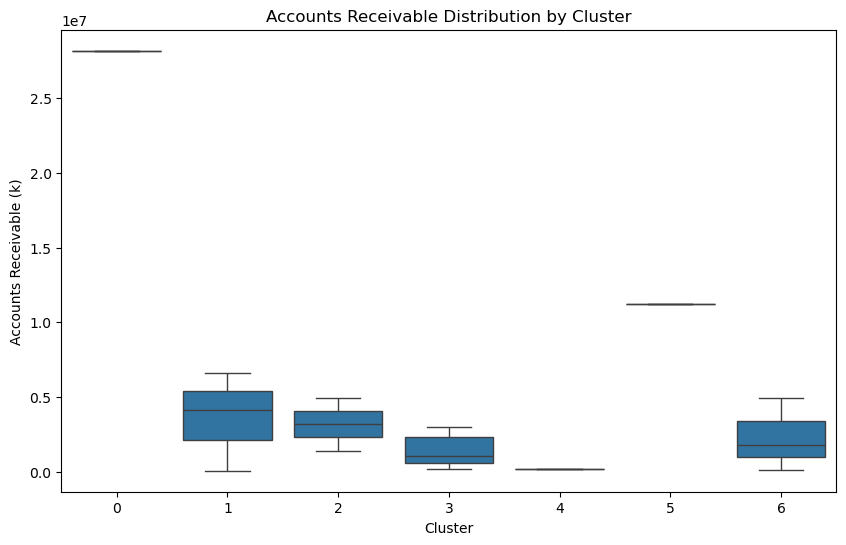

In [145]:
# Accounts Receivable vs Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='AccountsReceivableNetCurrent (k)', data=data_cleaned)
plt.title('Accounts Receivable Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Accounts Receivable (k)')
plt.show()

This boxplot visualizes the distribution of Accounts Receivable (k) across the 7 clusters identified by the K-Means algorithm.

**Visual Observations**:
1. High-Performing Cluster (Cluster 0):
- Cluster 0 has significantly higher accounts receivable values compared to all other clusters. The median value for this cluster is above 2.5×10^7, indicating that these companies operate at a much larger financial scale and likely have more substantial receivables due to higher sales or extended credit terms to customers.

2. Moderate-Performing Cluster (Clusters 5):
- Cluster 5 exhibits relatively higher accounts receivable values among other clusters with a median accounts receivable of approximately 1.2×10^7.

3. Low-Performing Clusters (Clusters 1, 2, 3, 4, and 6):
- Clusters 1, 2, 3, 4, and 6 display significantly lower accounts receivable values. Their median values are close to zero, indicating that these companies operate on a smaller financial scale or have limited credit sales activity.
- Cluster 4 is particularly consistent with almost no variation, suggesting a group of very small companies.

4. Accounts Receivable as a Key Differentiator:
- Accounts receivable serves as a clear differentiator among the clusters, with Cluster 0 standing out as a financial leader.
The financial scale of companies decreases progressively from Cluster 0 to Clusters 5, then to Clusters 1, 2, 3, 4, and 6.

**Interpretation for Clusters**:
1. Cluster 0:
- Companies in Cluster 0 likely operate in industries or markets where extending credit is common. Their high accounts receivable values align with their presumed larger scale of operations and potential for significant revenue generation.

2. Cluster 5:
- This cluster represents companies with moderate accounts receivable, suggesting medium-scale operations or more restricted credit policies compared to Cluster 0.

3. Clusters 1, 2, 3, 4, and 6:
- Companies in these clusters likely operate at smaller financial scales, potentially limiting their capacity for growth or credit-based sales strategies.

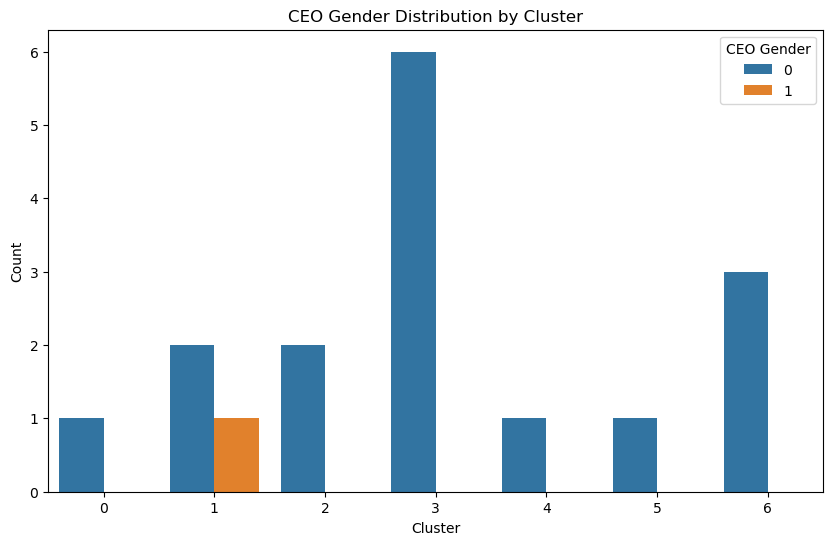

In [146]:
# CEO Gender vs Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='CEO Gender', data=data_cleaned)
plt.title('CEO Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='CEO Gender')
plt.show()

This count plot visualizes the distribution of CEO gender across the 7 clusters identified by the K-Means algorithm.

**Visual Observations**:
1. Male CEOs Dominate Across Most Clusters
- The majority of clusters are dominated by male CEOs (0), reflecting the overall gender imbalance in the dataset.

2. Clusters with Female CEOs
- Cluster 1 is the only cluster with female CEOs (1).

**Key Insights**:
1. Low Representation of Female CEOs:
- The lack of female CEOs in most clusters and the minimal representation in Cluster 1 reflects a broader gender imbalance in leadership roles within the dataset. This could indicate systemic barriers to female leadership.

2. Cluster-Specific Patterns:
- The presence of female CEOs in Cluster 1 suggests that this group may have distinct characteristics in terms of company operations, financial performance, or gender equality initiatives that correlate with female leadership.

### Summary of Clusters Based on K-Means Analysis

| **Cluster** | **Characteristics**                                                                                     | **Gender Equality and Respect**                                                                         | **Financial Observations**                                                                                     |
|-------------|---------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| **Cluster 0** | - High performers with outstanding Total Scores<br>- Consistently high Gross Profit, Revenue, Accounts Receivable, and Compensation Expenses | - Male-dominated leadership<br>- Represents top-performing companies with significant investments in gender equality initiatives | - Financial leaders operating on a large scale<br>- Significant resources enable investments in workplace improvements |
| **Cluster 1** | - Moderate Total Scores with high variability<br>- Mixed financial performance<br>- Includes female-led companies | - Includes the only representation of female CEOs<br>- Reflects potential for balancing gender equality and financial success | - Moderate financial resources<br>- Variation suggests differing engagement levels with equality initiatives   |
| **Cluster 2** | - Mid-range Total Scores<br>- Moderate Revenue and Gross Profit<br>- Low Accounts Receivable           | - Meets some gender equality standards but has room for improvement<br>- Limited consistency            | - Smaller companies with steady but constrained financial capacity                                              |
| **Cluster 3** | - Lowest Total Scores<br>- Minimal Gross Profit, Revenue, and Compensation Expenses<br>- Entirely male CEOs | - Struggles significantly with gender equality initiatives<br>- Limited progress due to financial constraints | - Financially weakest cluster<br>- Indicates systemic challenges in both financial performance and workplace initiatives |
| **Cluster 4** | - Low Total Scores with narrow variance<br>- Homogeneous with consistently low financial metrics       | - Fails to meet many gender equality standards<br>- Represents companies with limited resources for improvement | - Small-scale operations with minimal financial activity<br>- Consistent underperformance across key metrics   |
| **Cluster 5** | - High Total Scores with narrow variability<br>- Moderate Gross Profit and Revenue                     | - Strong performers in gender equality<br>- Focused and consistent engagement with equality initiatives | - Financially mid-level companies with stable performance<br>- Strong internal policies likely drive success  |
| **Cluster 6** | - Wide variability in Total Scores<br>- Low financial metrics                                         | - Inconsistent engagement with gender equality initiatives<br>- Reflects diversity in performance levels | - Financially weaker cluster<br>- Mix of improving and underperforming companies                               |


## Key Insights from Unsupervised Learning Analysis

**Gender Representation and Systemic Challenges**

- Cluster 0 stands out as the dominant group with highly distinctive financial performance across all metrics, including the highest Total Scores, Gross Profit, Revenue, Accounts Receivable, and Compensation Expenses.
- This reflects the reality that top-performing companies in the industry are still predominantly led by male CEOs. The systemic dominance of male leadership in these organizations underscores historical and structural barriers that have positioned men at the forefront of business leadership. Overcoming these barriers to see more female leadership in such top-performing companies will likely take time and significant systemic shifts.

**Moderate Financial Performance with Female Representation**

- Cluster 1 is the only one cluster which includes companies led by female CEOs and demonstrates moderate financial performance compared to other clusters.
- Female-led companies may show potential for balancing gender equality and financial performance. The presence of female leadership could contribute positively to organizational culture and workplace improvements, indirectly driving financial growth.